In [161]:
import os
from skimage import  io, color, transform
import skimage
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models


In [162]:

# create dataset

curr_dir = "D:/2nd-year-summer/machine learning/project/men-women"
# read men
men_files = os.listdir("{}/men".format(curr_dir))
women_files = os.listdir("{}/women".format(curr_dir))
img_width = 40
dictionary = {
    0:"man",
    1:"woman"
}


In [170]:
y=[]
x=[]
i = 0
total = len(men_files)
for man_file, woman_file in zip(men_files, women_files):
    man_path = "{}/men/{}".format(curr_dir, man_file)
    woman_path = "{}/women/{}".format(curr_dir, woman_file)
    imgMan = (io.imread(man_path))[:,:,:3]
    imgWoman = (io.imread(woman_path, as_gray=False))[:,:,0:3]

    imgMan = transform.resize(imgMan, (img_width,img_width))
    imgWoman = transform.resize(imgWoman, (img_width,img_width))
    y.append(0)
    x.append(imgMan)

    # x.append(imgMan.flatten())
    y.append(1)
    x.append(imgWoman)
    # print(imgMan.shape)
    # break
    i+=1
    if i % 10 == 0:
        print( "processed: {}/{}".format(i,total))
    # break
    # plt.figure()
    # plt.imshow(imgMan)
    # plt.figure()

    # plt.imshow(imgWoman)
    # break
    # print(man_path, woman_path)
print('done')

processed: 10/398
processed: 20/398
processed: 30/398
processed: 40/398
processed: 50/398
processed: 60/398
processed: 70/398
processed: 80/398
processed: 90/398
processed: 100/398
processed: 110/398
processed: 120/398
processed: 130/398
processed: 140/398
processed: 150/398
processed: 160/398
processed: 170/398
processed: 180/398
processed: 190/398
processed: 200/398
processed: 210/398
processed: 220/398
processed: 230/398
processed: 240/398
processed: 250/398
processed: 260/398
processed: 270/398
processed: 280/398
processed: 290/398
processed: 300/398
processed: 310/398
processed: 320/398
processed: 330/398
processed: 340/398
processed: 350/398
processed: 360/398
processed: 370/398
processed: 380/398
processed: 390/398
done


(716, 1600)
(716,)


In [171]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# split into train test sets
img_train, img_test, label_train, label_test = train_test_split(x, y, test_size=0.1, random_state=1, stratify=y)
print(Counter(label_train))
print(Counter(label_test))

Counter({1: 358, 0: 358})
Counter({0: 40, 1: 40})


In [172]:
# normalize 

img_train, img_test = np.array(img_train), np.array(img_test)
label_train, label_test = np.array(label_train), np.array(label_test)
# img_train, img_test = img_train/255, img_test/255

print(img_train.shape)
print(label_train.shape)

(716, 40, 40, 3)
(716,)


In [173]:
model = models.Sequential()
model.add(layers.Conv2D(img_width, (3, 3), activation='relu', input_shape=(img_width, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 38, 38, 40)        1120      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 19, 19, 40)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 17, 17, 64)        23104     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)              

In [174]:
print(img_train.shape)

(716, 40, 40, 3)


In [175]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(img_train,label_train, epochs=10, 
                    validation_data=(img_test,label_test))

Epoch 1/10
23/23 [==============================] - 5s 103ms/step - loss: 0.7093 - accuracy: 0.4848 - val_loss: 0.6870 - val_accuracy: 0.5250
Epoch 2/10
23/23 [==============================] - 2s 90ms/step - loss: 0.6854 - accuracy: 0.5778 - val_loss: 0.7401 - val_accuracy: 0.5000
Epoch 3/10
23/23 [==============================] - 2s 93ms/step - loss: 0.6896 - accuracy: 0.5641 - val_loss: 0.6478 - val_accuracy: 0.6250
Epoch 4/10
23/23 [==============================] - 2s 96ms/step - loss: 0.6545 - accuracy: 0.6039 - val_loss: 0.7588 - val_accuracy: 0.5500
Epoch 5/10
23/23 [==============================] - 2s 88ms/step - loss: 0.6613 - accuracy: 0.6477 - val_loss: 0.6568 - val_accuracy: 0.5375
Epoch 6/10
23/23 [==============================] - 2s 84ms/step - loss: 0.6418 - accuracy: 0.6120 - val_loss: 0.6463 - val_accuracy: 0.6125
Epoch 7/10
23/23 [==============================] - 2s 90ms/step - loss: 0.6495 - accuracy: 0.6239 - val_loss: 0.6296 - val_accuracy: 0.6125
Epoch 8/10
2

3/3 - 0s - loss: 0.6151 - accuracy: 0.6375


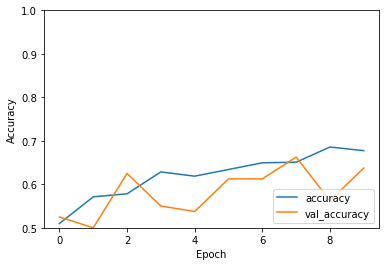

In [177]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(img_test,  label_test, verbose=2)

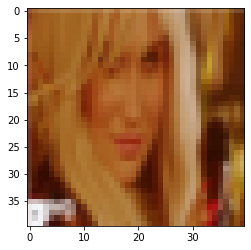

In [178]:
# plt.imshow()
plt.imshow(img_train[1])
# print(img_train[1])

In [179]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)